In [1]:
!pip install --upgrade pip
!pip install -U pandas
!pip install -U numpy
!pip install -U scipy
!pip install -U scikit-learn
!pip install xgboost

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (20.2.4)
Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.4)
Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (1.19.4)
Requirement already up-to-date: scipy in /opt/conda/lib/python3.6/site-packages (1.5.4)
Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.23.2)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# german_credit_data.csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
data = pd.read_csv('uci-secom.csv')

In [5]:
# 결측값을 0으로 대체합니다.
# np.NaN이 결측값입니다. 이것을 replace을 사용해서 0으로 바꿉니다.
data = data.replace(np.NaN, 0)

In [6]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 큰 영향이 없다 생각하여 삭제합니다.
# axis=0은 행방향으로 동작합니다. 
# axis=1은 열 방향으로 동작합니다. 
# drop() 안에 삭제할 컬럼 이름을 적고 axis =1 로 정합니다.
data = data.drop(columns = ['Time'], axis = 1)

data.shape

(1567, 591)

In [7]:
# data에서 잘 삭제되었는지 확인합니다.
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [9]:
#3,4,5,Pass/Fail 컬럼으로 새로운 DataFrame을 만듭니다. 리스트 안에 컬럼 이름을 적습니다. 
data_test= data[['100','101','102','103','104','105','106','107','108','109','Pass/Fail']]
data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


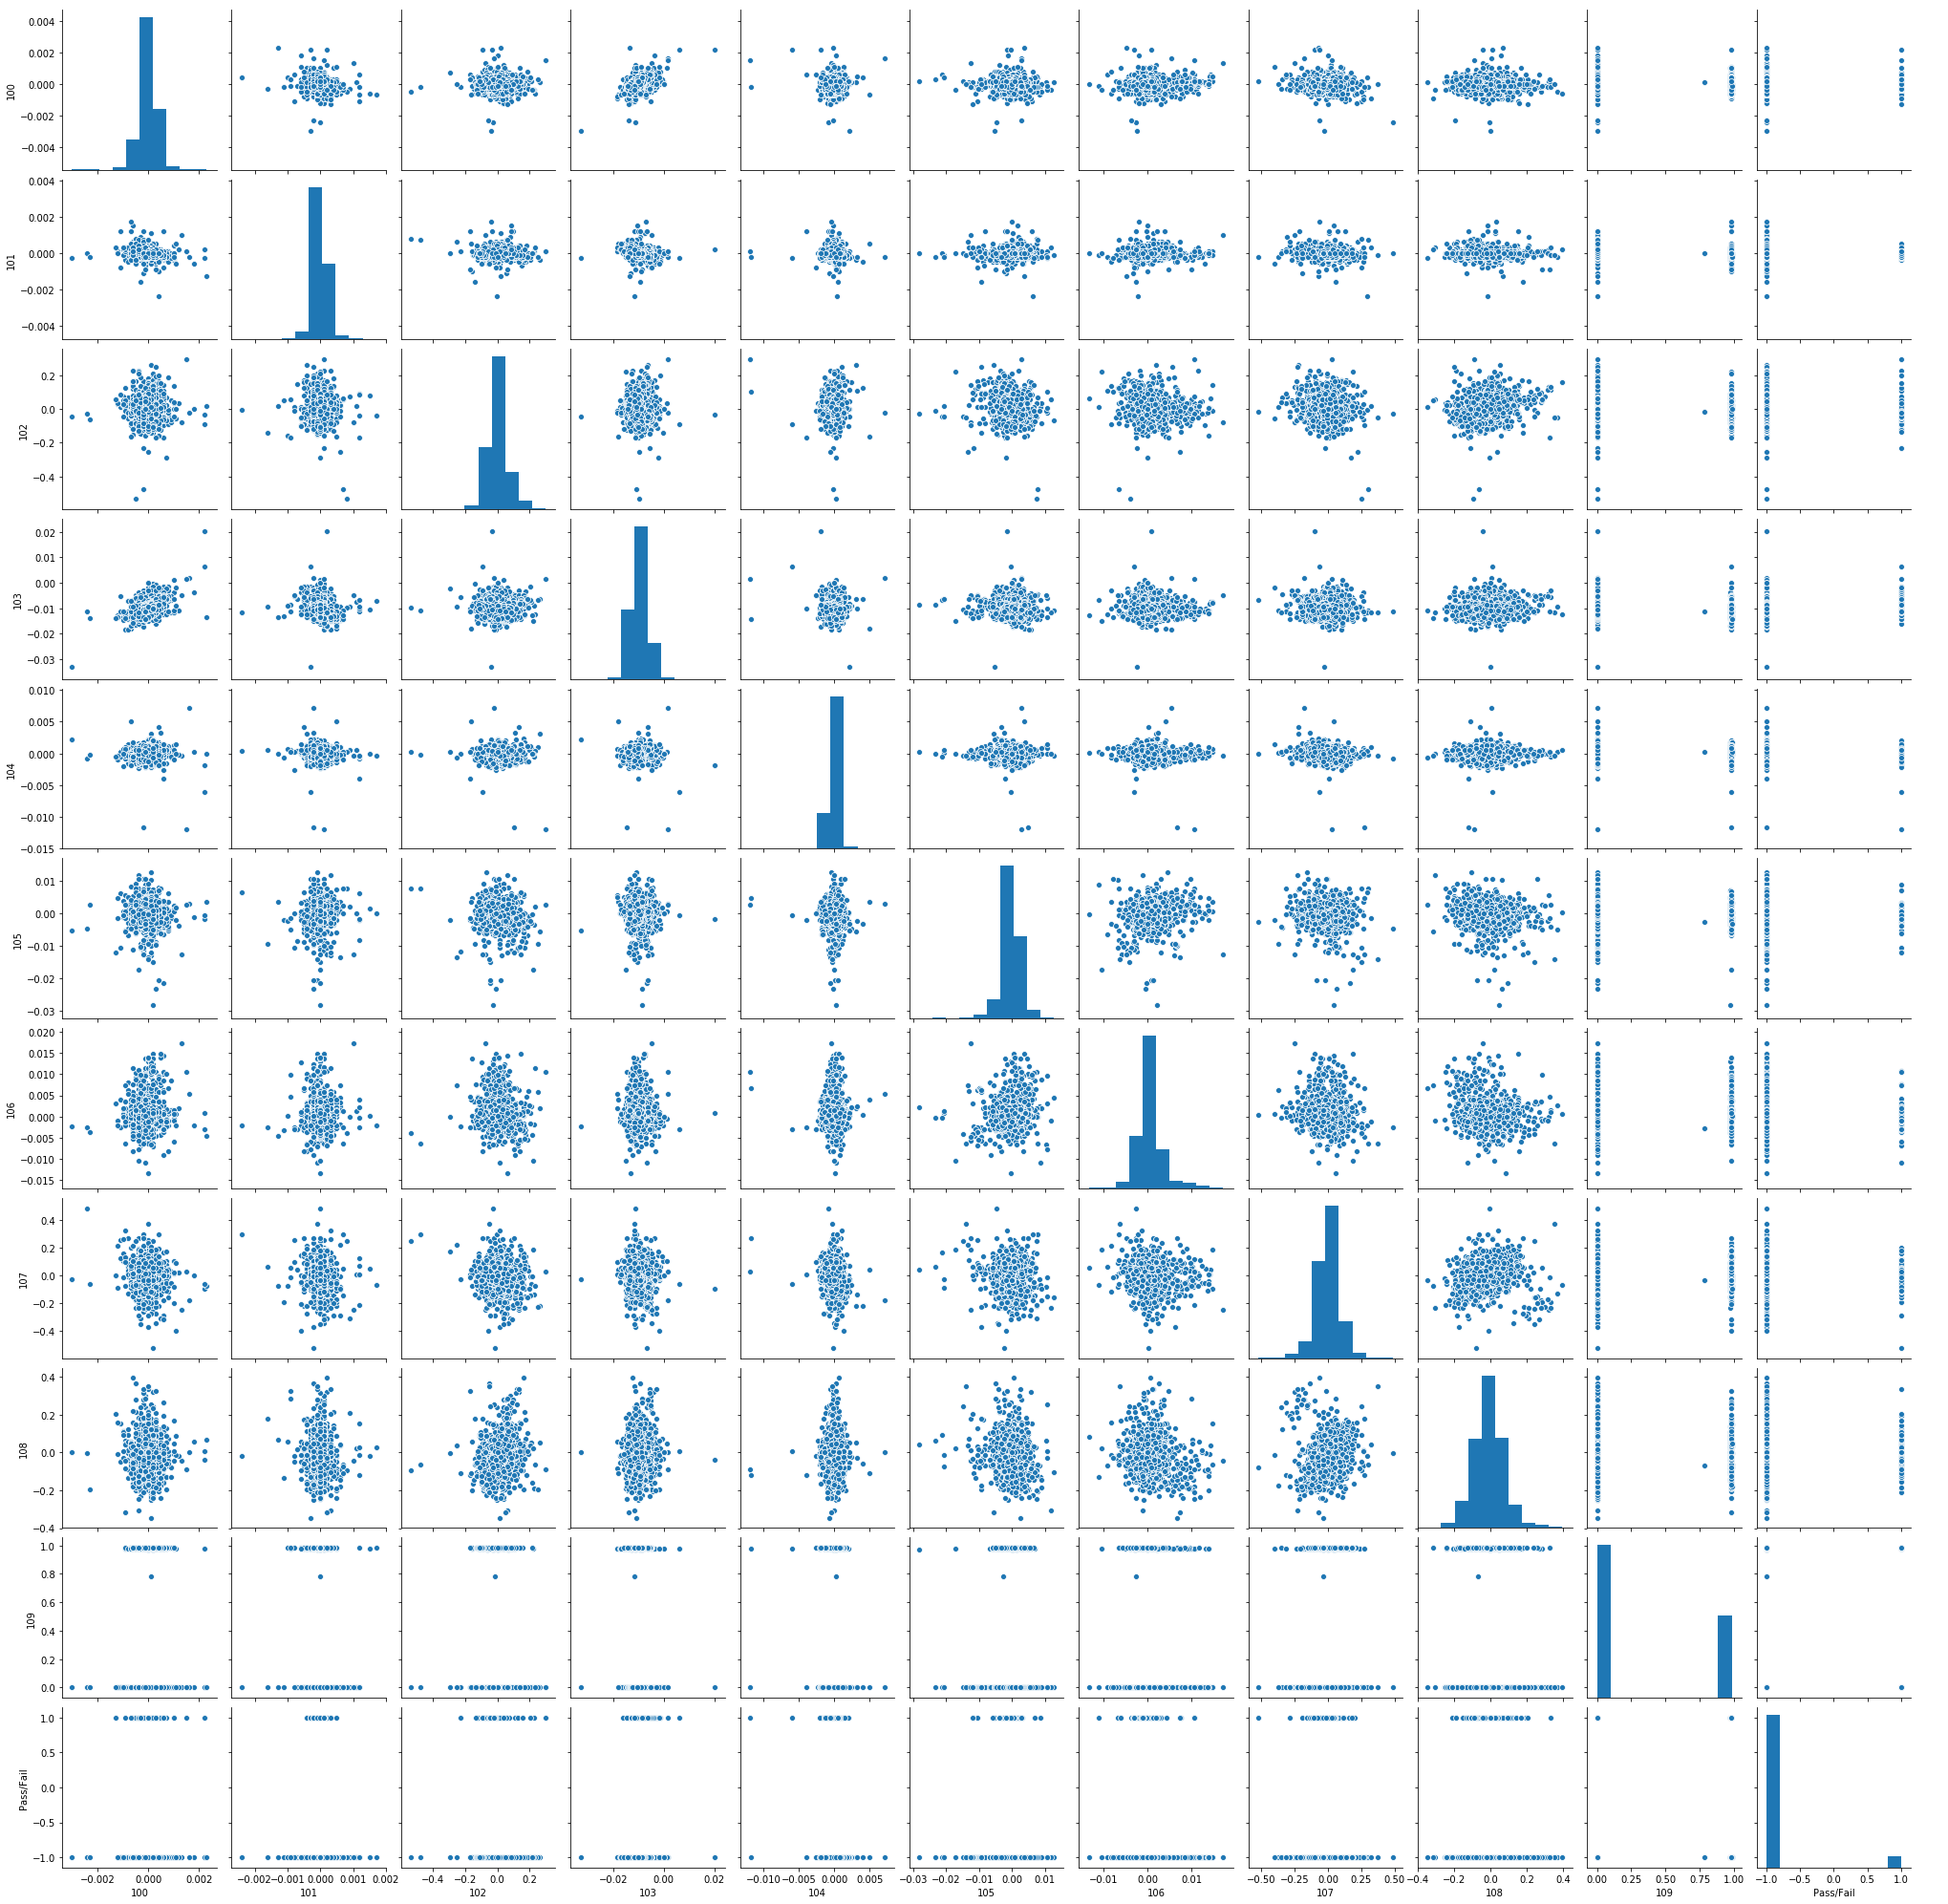

In [10]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교할 수 있습니다. 
sns.pairplot(data_test)

Text(0.5,1,'103 Sensor Measurements')

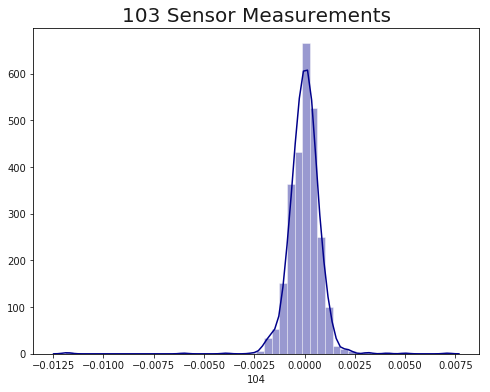

In [11]:
# 그래프의 사이즈를 설정합니다.
# subplots는 한 번에 여러 그래프를 보여주기 위해서 사용합니다. 
# subplots()에선 두개의 값을 받을 수 있는데 figure와 axes 값을 받을 수 있습니다. 여기서 변수명은 상관없습니다. 순서가 중요합니다.
# fig란 figure로써  전체 subplot을 말합니다. 몇개의 그래프가 있던지 상관없이 그것을 담는 그릇이라고 생각하면 됩니다. 전체 사이즈를 말합니다.
# ax는 axe로써 각각의 그래프를 말합니다. 
# figsize(가로, 세로)로 크기를 정합니다. 
fig, ax = plt.subplots(figsize=(8, 6))

# seborn 그래프의 스타일을 설정합니다.
# style에 white, whitegrid, dark 등을 넣어서 스타일을 바꿀 수 있습니다.
sns.set(style='darkgrid')

# 103번 데이터의 분포를 출력합니다.
# displot로 분포도를 그립니다. 
# yellow, green와 같은 색깔을 넣습니다. 
sns.distplot(data['104'], color = 'darkblue')

# 그래프의 제목을 설정합니다. 
plt.title('103 Sensor Measurements', fontsize = 20)

Text(0.5,1,'103 Sensor Measurements')

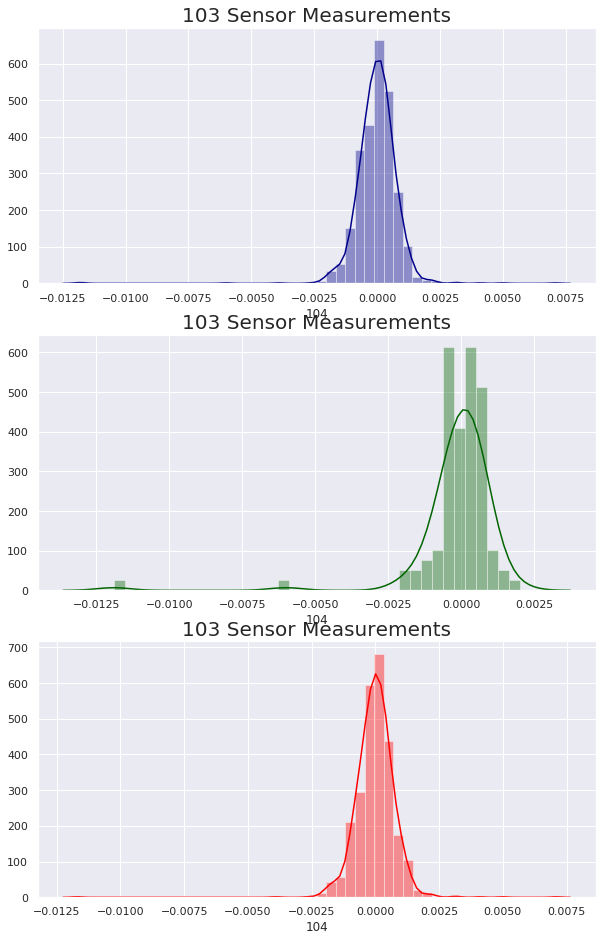

In [12]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다. 
plt.rcParams['figure.figsize'] = (10, 16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다. 
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다. 
plt.subplot(3, 1, 1)
sns.distplot(data['104'], color = 'darkblue')
plt.title('103 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 1인 데이터를 출력합니다.
#  data[data['Pass/Fail']==1]를 하면 'Pass/Fail' 값이 1인 행만 사용할 수 있습니다.
plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]['104'], color = 'darkgreen')
plt.title('103 Sensor Measurements', fontsize = 20)

# 'Pass/Fail' 값이 -1인 데이터를 출력합니다.
plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]['104'], color = 'red')
plt.title('103 Sensor Measurements', fontsize = 20)

Text(0.5,1,'104 Sensor Measurements')

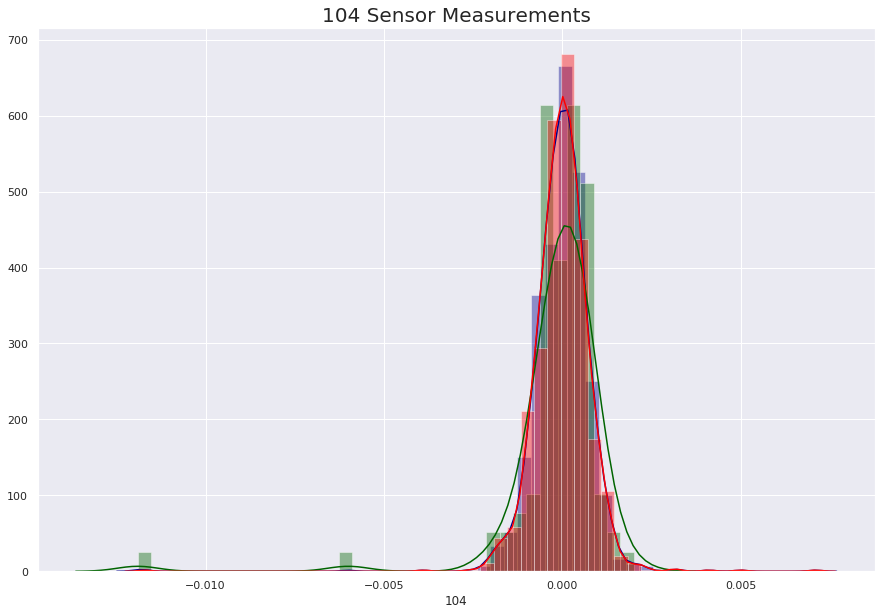

In [14]:
# 그래프의 사이즈를 설정합니다. 첫번째는 가로, 두번째는 세로의 크기입니다.
plt.rcParams['figure.figsize'] = (15, 10)

# 위 나누어 출력 했던 그래프를 한번에 출력합니다.
sns.distplot(data['104'], color = 'darkblue')
sns.distplot(data[data['Pass/Fail']==1]['104'], color = 'darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['104'], color = 'red')

# 제목과 폰트크기를 정합니다.
plt.title('104 Sensor Measurements', fontsize = 20)

In [15]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 x에 저장합니다.
# data에는 'Pass/Fail'의 없어집니다. 
x = data.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장합니다.
y = data['Pass/Fail']

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미합니다.
# 1차원 벡터 형태로 출력하기 위해 ravel 사용합니다. 
y = y.values
y

array([-1, -1,  1, ..., -1, -1, -1])

In [16]:
# 타입을 확인합니다. 
type(y)

numpy.ndarray

In [17]:
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 train_test_split을 사용하여 손쉽게 분리 할 수 있습니다.
# train_test_split를 사용해서 학습 데이터와 테스트 데이터를 분류합니다. 
# x는 머신러닝의 feature 데이터이고 y는 label(타겟) 데이터입니다. 
# test_size는 테스트 데이터의 비율입니다. 0.2는 20%가 테스트 데이터라는 뜻입니다. 
# random_state는 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수값입니다.
# train_test_split()는 호출시 무작위로 데이터를 분리합니다.
# random_state를 지정하지 않으면 수행할때마다 다른 학습/테스트 데이터를 생성합니다. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 불러옵니다.
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행합니다. 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train, x_test

(array([[-0.03046509, -0.04114539,  0.12555935, ...,  1.76817176,
          2.04130949,  5.0125072 ],
        [ 0.17480579,  0.2118661 ,  0.44705004, ..., -0.47244233,
         -0.27873119, -0.58252183],
        [-0.59892   ,  0.38892294,  0.38424139, ..., -0.9861441 ,
         -0.78308786, -0.84045381],
        ...,
        [ 0.14042278, -0.25706142, -0.03982154, ..., -1.32496867,
         -1.38831586, -0.88403282],
        [ 0.3628311 , -0.07385994, -0.26243743, ..., -0.48337216,
         -0.44685008, -0.66491315],
        [-0.24449391, -0.23834301, -0.10616653, ..., -1.0298634 ,
         -1.15294942, -0.77110241]]),
 array([[-4.29653971e-01, -3.59301506e-01, -4.86249310e-04, ...,
         -9.86144100e-01, -1.05207808e+00, -7.39544727e-01],
        [-3.81323140e-01,  3.79307704e-01,  4.60072576e-01, ...,
          8.49787339e-02,  2.25625479e-01, -3.37420608e-01],
        [ 9.56059348e-02,  4.05536240e-01,  1.16663027e-01, ...,
          4.78452428e-01, -9.74096680e-03, -8.83767719e-

In [20]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 분류기 모델 class를 가져 옵니다.
# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터로 본 실습에서는 default 값으로는 모자르기에 아래와 같이 설정합니다.
model = LogisticRegression(max_iter =5000)

# 데이터를 학습시킬 때는 fit 함수를 사용합니다. 
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 확인합니다. 
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9880287310454908
0.8789808917197452


In [21]:
# predict으로 얼마나 예측하는지 알 수 있습니다.
# accuracy_score로 정확도를 평가할 수 있습니다. 
from sklearn.metrics import accuracy_score

# x_test로 예측을 해봅니다. 
# score와 같은 값이 나오는 것을 볼 수 있습니다.
model_preds = model.predict(x_test)
print(accuracy_score(y_test, model_preds ))

0.8789808917197452


In [22]:
#xgboost 설치가 잘 안되면 Anaconda Powershell Prompt(anaconda3)에서 해봅니다.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


#여러 모델을 append해서 추가합니다. 
models = []
models.append(('LR', LogisticRegression(max_iter =5000))) #로지스틱 회귀모델 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습을 합니다. 
    model.fit(x_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.988029, test score : 0.878981
LDA - train_score : 0.979250, test score : 0.904459
KNN - train_score : 0.929769, test score : 0.958599
CART - train_score : 1.000000, test score : 0.891720
NB - train_score : 0.201915, test score : 0.152866
RF - train_score : 1.000000, test score : 0.958599
SVM - train_score : 0.932961, test score : 0.958599
XGB - train_score : 1.000000, test score : 0.955414


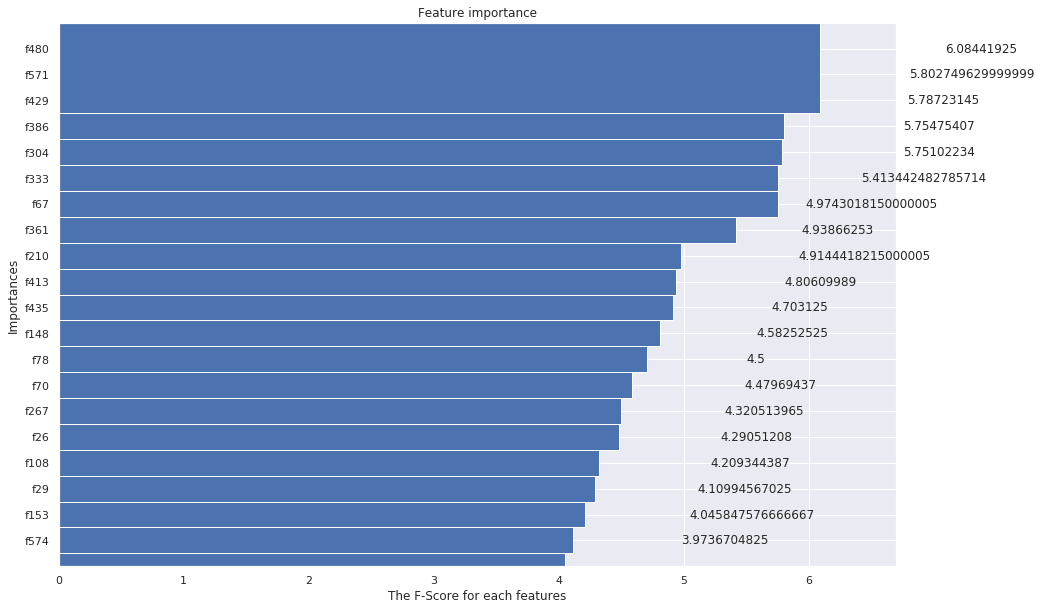

In [23]:
# xgb 모델에서 변수 중요도를 출력합니다.
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용합니다. 
# models[-1][1]는 models 리스트에서 맨 마지막 요소(이것도 리스트)에서 두번째 요소를 말합니다. 
# importance_type는 중요도가 어떻게 계산되는지 정합니다. 
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균입니다. 

xgb.plot_importance(models[-1][1], height = 5, grid = True, importance_type = 'gain', show_values = True, max_num_features = 20)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

In [25]:
# KFold 예시입니다.
# DecisionTreeClassifier로 결정트리모델을 사용합니다. 
# accuracy_score로 평가를 합니다. 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성합니다.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [26]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환합니다. 
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출합니다.
    x1_train, x1_test = features[train_index], features[test_index]
    y1_train, y1_test = label[train_index], label[test_index]
    #학습 및 예측합니다.
    dt_clf.fit(x1_train , y1_train)    
    pred = dt_clf.predict(x1_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정합니다.
    accuracy = np.round(accuracy_score(y1_test,pred), 4)
    train_size = x1_train.shape[0]
    test_size = x1_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산합니다.
# mean은 평균입니다. 
print('\n# 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

# 평균 검증 정확도: 0.9


In [27]:
from sklearn.model_selection import GridSearchCV
# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
# C 값이 작아지면 Penalty가 강해집니다. 
# C 값이 크면 Penalty가 약해집니다.(정규화가 없어진다)
# 보통 로그스케일로 지정합니다. = 0.01, 0.1, 1, 10
parameters = {'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']}

# 로지스틱 분류기 모델을 튜닝하기 위하여 선언합니다.
LR = LogisticRegression(max_iter = 1000)

# 데이터를 준비합니다.
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 모델 튜닝을 위해서 GridSearchCV를 사용합니다.
# 정확도로 평가를 합니다. 
# cv는 세트 수입니다. 
LR_CV = GridSearchCV(LR, parameters, scoring = 'accuracy', cv = 5)

# 학습을 수행합니다.
LR_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(LR_CV.score(x_train, y_train))
print(LR_CV.score(x_test, y_test))

# 특정 파라미터 조합이 지원하지 않는 경우가 있기에 Warning 메시지가 출력됩니다.

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

0.9273743016759777
0.9585987261146497


In [28]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train, y_train)

# GridSearchCV를 사용하지 않았을 때와 비교해봅니다.
print(LR.score(x_test, y_test))

0.8789808917197452


In [29]:
# 가장 성능이 좋았던 파라미터를 출력합니다.
LR_CV.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [30]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_LR_CV = LR_CV.best_estimator_
print(best_LR_CV)

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_LR_CV.score(x_test, y_test)

LogisticRegression(C=0.001, max_iter=1000)


0.9585987261146497

In [31]:
# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리합니다.
iris = load_iris()
x2_train, x2_test, y2_train, y2_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# parameter 들을 dictionary 형태로 설정합니다.
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}


# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(x2_train, y2_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환합니다.
scores_df = pd.DataFrame(grid_dtree.cv_results_)

#확인해봅니다. #mean_test_score가 높은 것이 좋은 것입니다. rank_text_score에서 순위를 확인할 수 있습니다. 
scores_df[['params', 'mean_test_score', 'rank_test_score','split0_test_score', 'split1_test_score', 'split2_test_score']]




,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [34]:
df = pd.read_csv("manufacture_test_feature.csv")
df

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-11-09 15:05:00,2958.83,2488.50,2197.5222,1373.0077,1.1369,100.0,106.0733,0.1240,1.3886,...,NaN,NaN,0.4975,0.0142,0.0031,2.8592,0.0246,0.0064,0.0022,25.9900
1,2008-10-14 03:21:00,3073.57,2528.59,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.4234,...,NaN,NaN,0.4950,0.0115,0.0028,2.3235,0.0138,0.0162,0.0047,117.7603
2,2008-09-24 10:10:00,2995.73,2515.83,2231.6111,2005.8966,1.2969,100.0,93.7522,0.1234,1.4136,...,0.0047,183.3928,0.5011,0.0103,0.0027,2.0617,0.0090,0.0166,0.0047,183.3928
3,2008-08-27 22:58:00,2940.56,2490.68,2170.9667,1600.3858,1.0430,100.0,104.9756,0.1249,1.4035,...,NaN,NaN,0.4954,0.0114,0.0033,2.3065,0.0050,0.0138,0.0047,276.8808
4,2008-03-08 13:09:00,2955.85,2623.10,2191.6667,1107.4330,1.3529,100.0,103.4233,0.1206,1.4395,...,0.0087,80.7240,0.5001,0.0129,0.0034,2.5817,0.0354,0.0286,0.0087,80.7240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2008-09-28 04:45:00,2882.22,2518.89,2254.8667,2347.9092,1.2986,100.0,87.8044,0.1205,1.4600,...,0.0030,39.1032,0.4984,0.0155,0.0043,3.1107,0.0275,0.0108,0.0030,39.1032
310,2008-09-16 17:07:00,2997.94,2471.97,2214.1667,1705.2046,0.9113,100.0,100.4633,0.1231,1.4964,...,0.0057,136.9762,0.4991,0.0086,0.0026,1.7286,0.0140,0.0192,0.0057,136.9762
311,2008-09-21 09:31:00,3075.10,2614.51,2168.7333,999.5929,1.3739,100.0,104.8544,0.1217,1.5578,...,NaN,NaN,0.4980,0.0077,0.0021,1.5393,0.0202,0.0069,0.0028,34.1793
312,2008-08-31 05:05:00,2974.20,2449.16,2231.4889,1275.3021,1.6787,100.0,94.1256,0.1193,1.4868,...,NaN,NaN,0.4936,0.0150,0.0036,3.0343,0.0225,0.0193,0.0057,85.7175


In [36]:
# 결측값을 0으로 대체합니다.
# np.NaN이 결측값입니다. 이것을 replace을 사용해서 0으로 바꿉니다.
df = df.replace(np.NaN, 0)

# 결측값 정보를 출력합니다.
df.isnull().sum()

Time    0
0       0
1       0
2       0
3       0
       ..
585     0
586     0
587     0
588     0
589     0
Length: 591, dtype: int64

In [37]:
# 'Time'변수의 데이터는 pass/fail을 예측하는데 큰 영향이 없다 생각하여 삭제합니다.
# axis=0은 행방향으로 동작합니다. 
# axis=1은 열 방향으로 동작합니다. 
# drop() 안에 삭제할 컬럼 이름을 적고 axis =1 로 정합니다.
df = df.drop(columns = ['Time'], axis = 1)

df.shape

(314, 590)

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,2958.83,2488.50,2197.5222,1373.0077,1.1369,100.0,106.0733,0.1240,1.3886,0.0107,...,0.0000,0.0000,0.4975,0.0142,0.0031,2.8592,0.0246,0.0064,0.0022,25.9900
1,3073.57,2528.59,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.4234,-0.0045,...,0.0000,0.0000,0.4950,0.0115,0.0028,2.3235,0.0138,0.0162,0.0047,117.7603
2,2995.73,2515.83,2231.6111,2005.8966,1.2969,100.0,93.7522,0.1234,1.4136,0.0129,...,0.0047,183.3928,0.5011,0.0103,0.0027,2.0617,0.0090,0.0166,0.0047,183.3928
3,2940.56,2490.68,2170.9667,1600.3858,1.0430,100.0,104.9756,0.1249,1.4035,0.0020,...,0.0000,0.0000,0.4954,0.0114,0.0033,2.3065,0.0050,0.0138,0.0047,276.8808
4,2955.85,2623.10,2191.6667,1107.4330,1.3529,100.0,103.4233,0.1206,1.4395,0.0012,...,0.0087,80.7240,0.5001,0.0129,0.0034,2.5817,0.0354,0.0286,0.0087,80.7240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2882.22,2518.89,2254.8667,2347.9092,1.2986,100.0,87.8044,0.1205,1.4600,0.0029,...,0.0030,39.1032,0.4984,0.0155,0.0043,3.1107,0.0275,0.0108,0.0030,39.1032
310,2997.94,2471.97,2214.1667,1705.2046,0.9113,100.0,100.4633,0.1231,1.4964,-0.0099,...,0.0057,136.9762,0.4991,0.0086,0.0026,1.7286,0.0140,0.0192,0.0057,136.9762
311,3075.10,2614.51,2168.7333,999.5929,1.3739,100.0,104.8544,0.1217,1.5578,0.0110,...,0.0000,0.0000,0.4980,0.0077,0.0021,1.5393,0.0202,0.0069,0.0028,34.1793
312,2974.20,2449.16,2231.4889,1275.3021,1.6787,100.0,94.1256,0.1193,1.4868,-0.0089,...,0.0000,0.0000,0.4936,0.0150,0.0036,3.0343,0.0225,0.0193,0.0057,85.7175


In [40]:
#3,4,5,Pass/Fail 컬럼으로 새로운 DataFrame을 만듭니다. 리스트 안에 컬럼 이름을 적습니다. 
df_test= df[['100','101','102','103','104','105','106','107','108','109']]

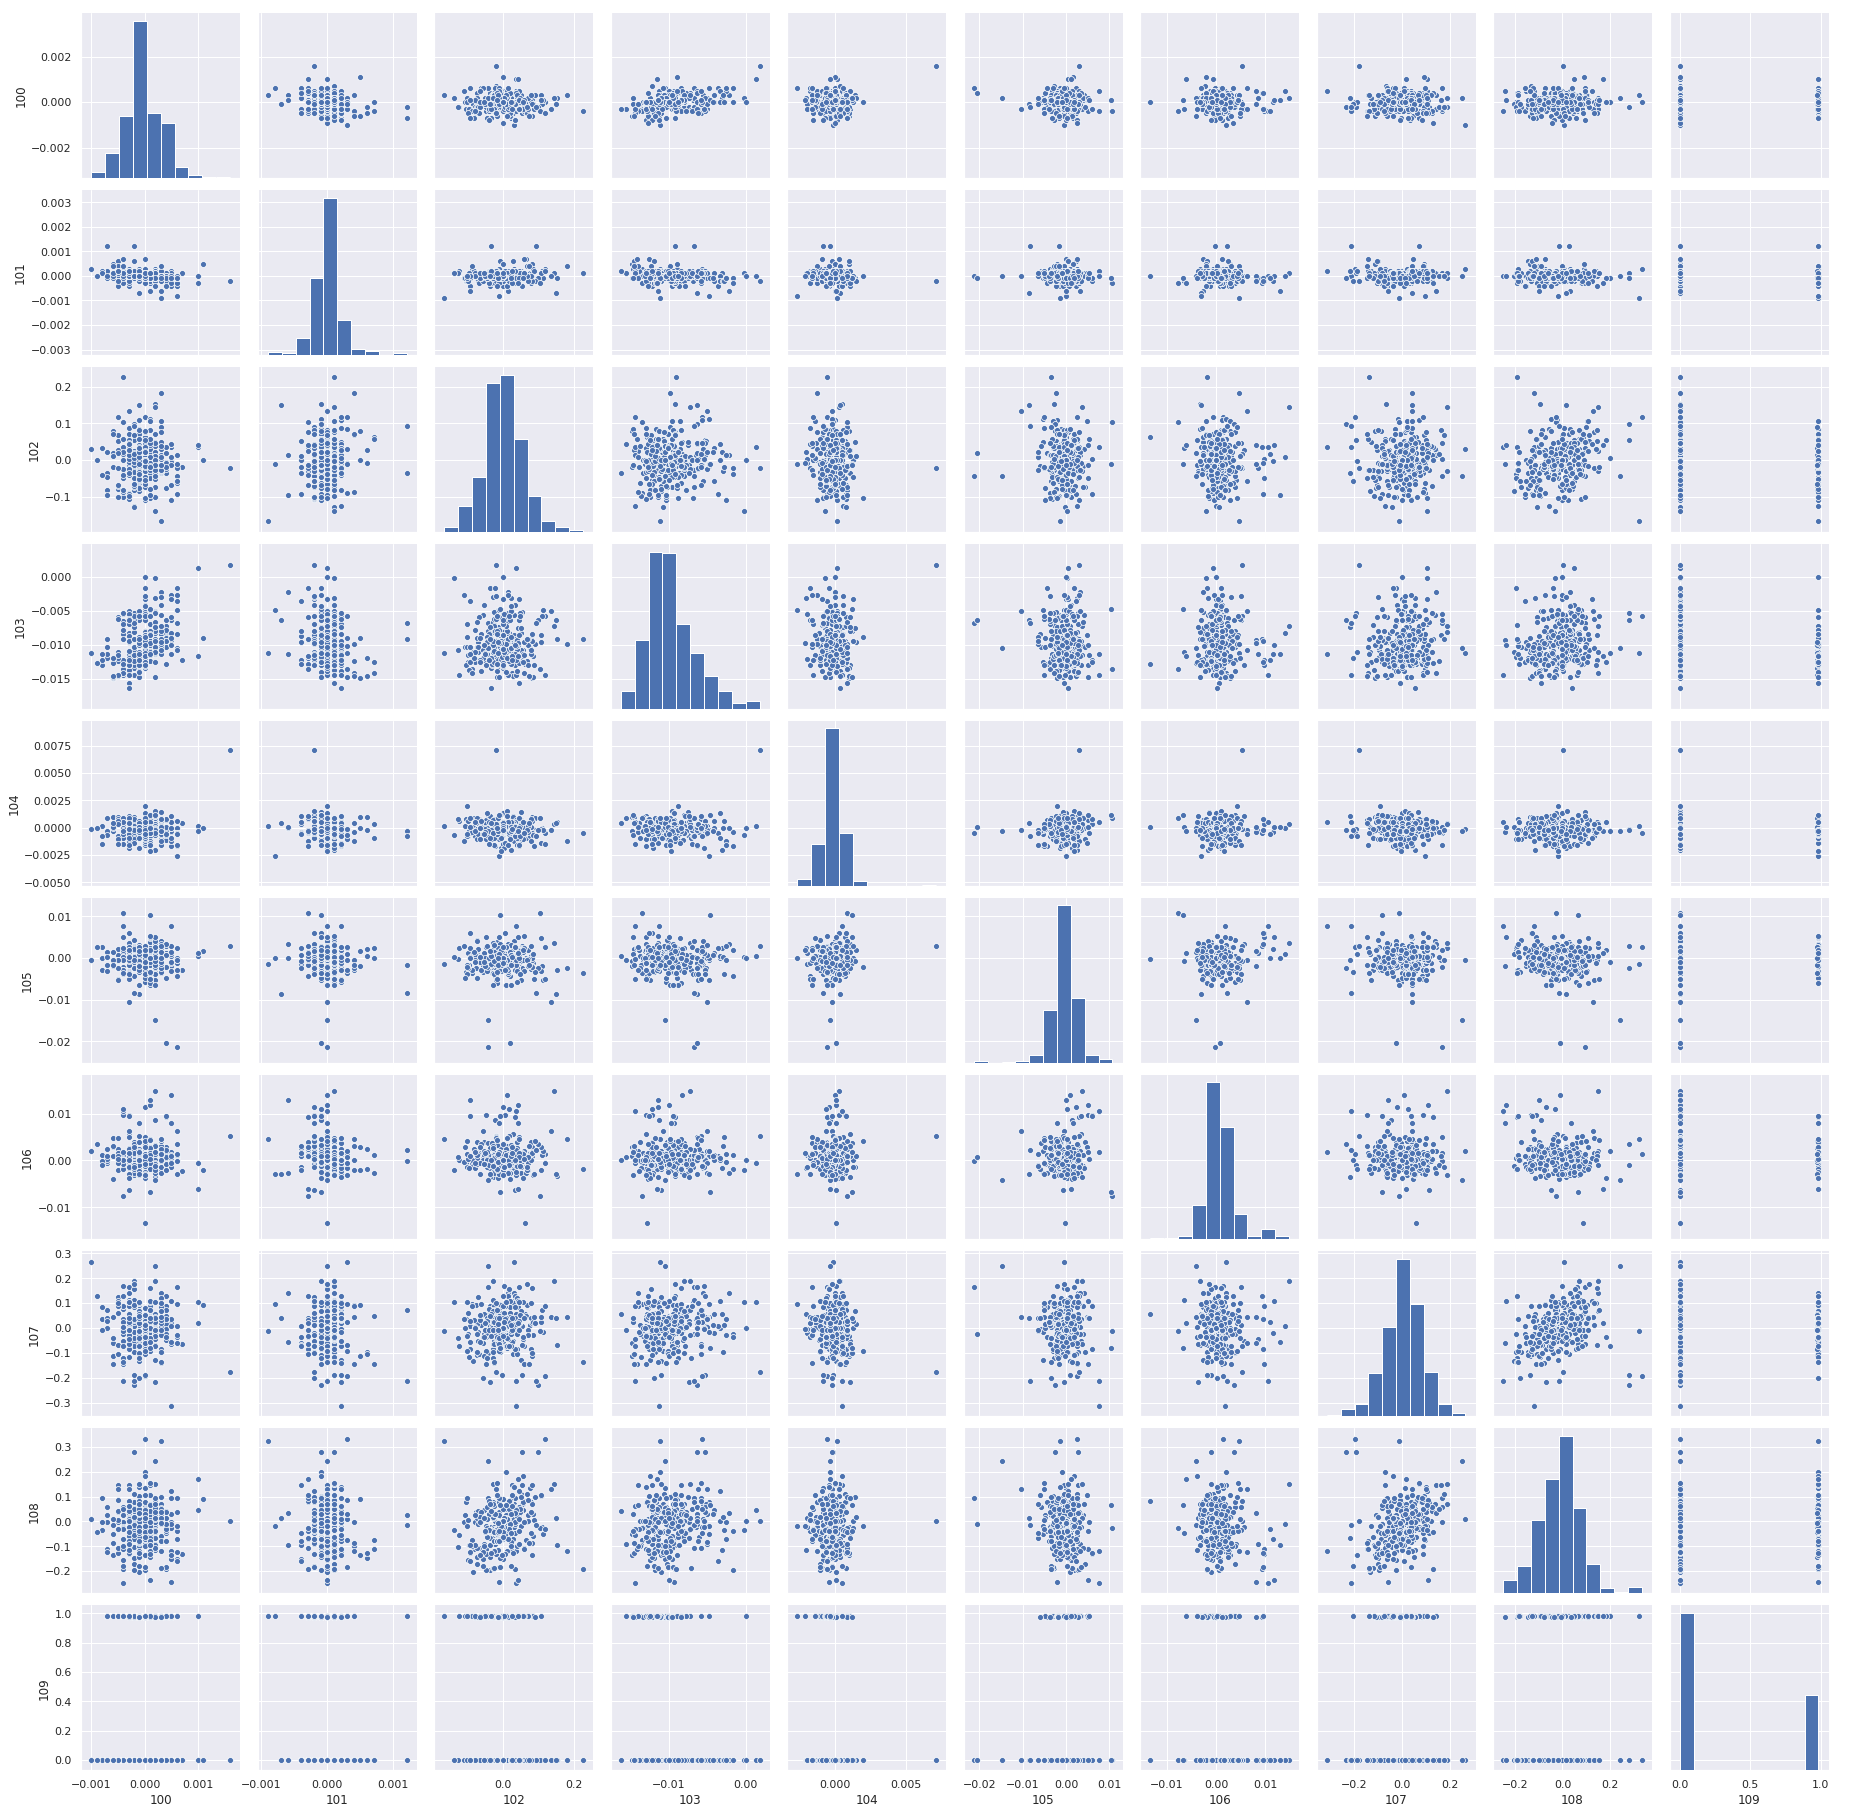

In [41]:
#seaborn의 pairplot()을 사용해서 컬럼끼리 비교할 수 있습니다. 
sns.pairplot(df_test)

In [46]:
df = df.values

In [47]:
# 타입을 확인합니다. 
type(df)

numpy.ndarray

In [48]:
# 0번부터 9번까지 10개를 출력해보겠습니다.
for i in range(100): 
    
    # XGB 모델을 사용하였습니다.
    # reshape()에서 -1이 들어간 곳은 가변적으로 바꿉니다. 예를 들어 12개의 원소가 있고 reshape(-1,2)를 하면 열 2개를 맞추기 위해서 행을 6개로 바꿉니다. 
    prediction = models[-1][1].predict(df[i].reshape(1,-1))
    
    #문자열 포맷팅의 방법입니다. {}가 괄호()안의 값에 각각 대응됩니다. 
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
1 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
2 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
3 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
4 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
5 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
6 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
7 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
8 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
9 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
10 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
11 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
12 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
13 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
14 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
15 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
16 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
17 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
18 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
19 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
20 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
21 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
22 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
23 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
24 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: -1
25 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
26 번째 테스트 데이터의 예측 결과: -1, 실제 데이터: -1
27 번째 테스트 데이터의 예

In [57]:
df_list = []
for i in range(len(df)):
    df_list.append(models[-1][1].predict(df[i].reshape(1,-1)))


In [103]:
df_list

[array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 a

In [104]:
len(df_list)

314

In [105]:
df2 = pd.DataFrame(df_list)

In [106]:
df2

,0
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
309,-1
310,-1
311,-1
312,1


In [107]:
df2 = df2.values

In [111]:
type(df2)

numpy.ndarray

In [112]:
# # columns 옵션을 주면 열(칼럼) 이름을 지정하여 생성이 가능
c = ['Pass/Fail']
df2 = pd.DataFrame(df2, columns=c)
df2

,Pass/Fail
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
309,-1
310,-1
311,-1
312,1


In [115]:
temp_data = pd.DataFrame(df2)
temp_data.to_csv("PassOrFail.csv", header=True, index=False)